In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.4.1


In [ ]:
dataset = tf.data.Dataset.range(10)
print(dataset)
print(dataset.element_spec)
for val in dataset:
   print(val.numpy())

<RangeDataset shapes: (), types: tf.int64>
TensorSpec(shape=(), dtype=tf.int64, name=None)
0
1
2
3
4
5
6
7
8
9


# window(
    size, shift=None, stride=1, drop_remainder=False
)

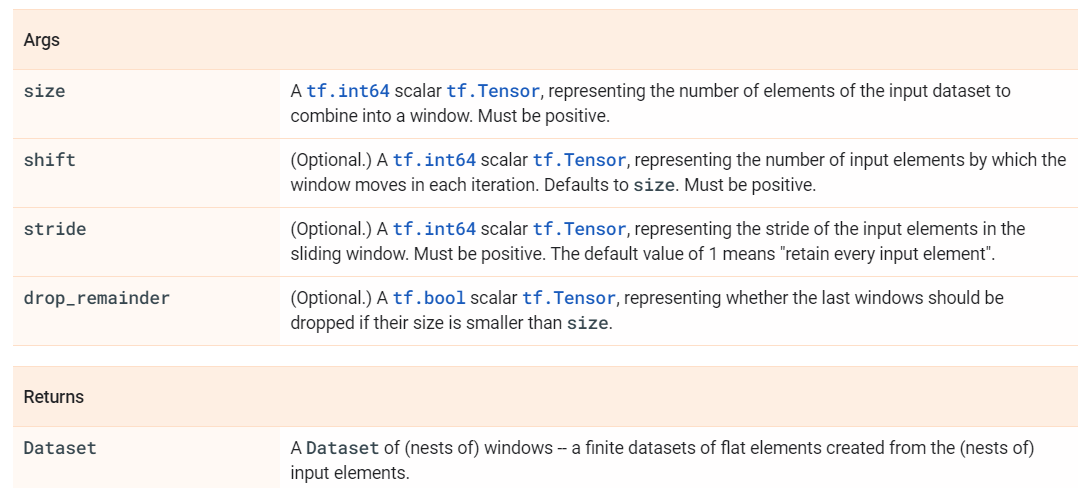


In [ ]:
dataset = tf.data.Dataset.range(7).window(2)
print(dataset.element_spec)
for i in dataset:
  print(i)                  # 4 elements are there in dataset and in each element there is 2 components(subelements) which a element is comprise of

DatasetSpec(TensorSpec(shape=(), dtype=tf.int64, name=None), TensorShape([]))
<_VariantDataset shapes: (), types: tf.int64>
<_VariantDataset shapes: (), types: tf.int64>
<_VariantDataset shapes: (), types: tf.int64>
<_VariantDataset shapes: (), types: tf.int64>


In [ ]:
dataset

<WindowDataset shapes: DatasetSpec(TensorSpec(shape=(), dtype=tf.int64, name=None), TensorShape([])), types: DatasetSpec(TensorSpec(shape=(), dtype=tf.int64, name=None), TensorShape([]))>

In [ ]:
dataset = tf.data.Dataset.range(7).window(2)
l=[]
for window in dataset:
  l.append(window.as_numpy_iterator())
for i in l[0]:
  print(i)  

0
1


In [ ]:
dataset = tf.data.Dataset.range(7).window(2)
for window in dataset:
  for j in window:
    print(j,end=",")
  print()                                     # 4 elements are there in dataset and in each element there is 2 components(subelements) which a element is comprise of

tf.Tensor(0, shape=(), dtype=int64),tf.Tensor(1, shape=(), dtype=int64),
tf.Tensor(2, shape=(), dtype=int64),tf.Tensor(3, shape=(), dtype=int64),
tf.Tensor(4, shape=(), dtype=int64),tf.Tensor(5, shape=(), dtype=int64),
tf.Tensor(6, shape=(), dtype=int64),


In [ ]:
dataset = tf.data.Dataset.range(7).window(2)
for window in dataset:
  print(list(window.as_numpy_iterator()))
print()  



dataset = tf.data.Dataset.range(7).window(3, 2, 1, True)
for window in dataset:
  print(list(window.as_numpy_iterator()))
print()


dataset = tf.data.Dataset.range(7).window(3, 1, 2, True)
for window in dataset:
  print(list(window.as_numpy_iterator()))




[0, 1]
[2, 3]
[4, 5]
[6]

[0, 1, 2]
[2, 3, 4]
[4, 5, 6]

[0, 2, 4]
[1, 3, 5]
[2, 4, 6]


In [ ]:
dataset = tf.data.Dataset.range(10)
dataset = dataset.window(5, shift=1)
print(dataset.element_spec)
for window_dataset in dataset:
  for val in window_dataset:
    print(val.numpy(), end=" ")
  print()

DatasetSpec(TensorSpec(shape=(), dtype=tf.int64, name=None), TensorShape([]))
0 1 2 3 4 
1 2 3 4 5 
2 3 4 5 6 
3 4 5 6 7 
4 5 6 7 8 
5 6 7 8 9 
6 7 8 9 
7 8 9 
8 9 
9 


In [ ]:
dataset = tf.data.Dataset.range(10)
dataset = dataset.window(5, shift=1, drop_remainder=True)
for window_dataset in dataset:
  for val in window_dataset:
    print(val.numpy(), end=" ")
  print()

0 1 2 3 4 
1 2 3 4 5 
2 3 4 5 6 
3 4 5 6 7 
4 5 6 7 8 
5 6 7 8 9 


In [ ]:
dataset=tf.data.Dataset.range(10)          # 10 elements in dataset
for i in dataset:
  print(i)

tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(3, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)
tf.Tensor(5, shape=(), dtype=int64)
tf.Tensor(6, shape=(), dtype=int64)
tf.Tensor(7, shape=(), dtype=int64)
tf.Tensor(8, shape=(), dtype=int64)
tf.Tensor(9, shape=(), dtype=int64)


In [ ]:
dataset=dataset.batch(3,drop_remainder=True)       # 3 elements in dataset
for i in dataset:
  print(i)                

tf.Tensor([0 1 2], shape=(3,), dtype=int64)
tf.Tensor([3 4 5], shape=(3,), dtype=int64)
tf.Tensor([6 7 8], shape=(3,), dtype=int64)


In [ ]:
dataset = tf.data.Dataset.range(10)
dataset = dataset.window(5, shift=1, drop_remainder=True)  # dataset consist of 6 elements in which each element is made of 5 scalar tensors  of shape=()
print(dataset.element_spec)
for window in dataset:
  for j in window:
    print(j,end=",")
  print()

DatasetSpec(TensorSpec(shape=(), dtype=tf.int64, name=None), TensorShape([]))
tf.Tensor(0, shape=(), dtype=int64),tf.Tensor(1, shape=(), dtype=int64),tf.Tensor(2, shape=(), dtype=int64),tf.Tensor(3, shape=(), dtype=int64),tf.Tensor(4, shape=(), dtype=int64),
tf.Tensor(1, shape=(), dtype=int64),tf.Tensor(2, shape=(), dtype=int64),tf.Tensor(3, shape=(), dtype=int64),tf.Tensor(4, shape=(), dtype=int64),tf.Tensor(5, shape=(), dtype=int64),
tf.Tensor(2, shape=(), dtype=int64),tf.Tensor(3, shape=(), dtype=int64),tf.Tensor(4, shape=(), dtype=int64),tf.Tensor(5, shape=(), dtype=int64),tf.Tensor(6, shape=(), dtype=int64),
tf.Tensor(3, shape=(), dtype=int64),tf.Tensor(4, shape=(), dtype=int64),tf.Tensor(5, shape=(), dtype=int64),tf.Tensor(6, shape=(), dtype=int64),tf.Tensor(7, shape=(), dtype=int64),
tf.Tensor(4, shape=(), dtype=int64),tf.Tensor(5, shape=(), dtype=int64),tf.Tensor(6, shape=(), dtype=int64),tf.Tensor(7, shape=(), dtype=int64),tf.Tensor(8, shape=(), dtype=int64),
tf.Tensor(5, shap

In [ ]:
dataset = dataset.flat_map(lambda window: window.batch(5))   # dataset consist of 6 elements in which each element is made of 1d tensors of shape=(5,)
print(dataset.element_spec)
print(dataset)
print()
for window in dataset:
  print(window)
print()  
for window in dataset:
  print(window.numpy())  

TensorSpec(shape=(None,), dtype=tf.int64, name=None)
<FlatMapDataset shapes: (None,), types: tf.int64>

tf.Tensor([0 1 2 3 4], shape=(5,), dtype=int64)
tf.Tensor([1 2 3 4 5], shape=(5,), dtype=int64)
tf.Tensor([2 3 4 5 6], shape=(5,), dtype=int64)
tf.Tensor([3 4 5 6 7], shape=(5,), dtype=int64)
tf.Tensor([4 5 6 7 8], shape=(5,), dtype=int64)
tf.Tensor([5 6 7 8 9], shape=(5,), dtype=int64)

[0 1 2 3 4]
[1 2 3 4 5]
[2 3 4 5 6]
[3 4 5 6 7]
[4 5 6 7 8]
[5 6 7 8 9]


In [ ]:
dataset = tf.data.Dataset.range(10)
dataset = dataset.window(5, shift=1, drop_remainder=True)
dataset = dataset.flat_map(lambda window: window.batch(5))
dataset = dataset.map(lambda window: (window[:-1], window[-1:]))
print(dataset.element_spec)
print(dataset)
for x,y in dataset:
  print(x.numpy(), y.numpy())

(TensorSpec(shape=(None,), dtype=tf.int64, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))
<MapDataset shapes: ((None,), (None,)), types: (tf.int64, tf.int64)>
[0 1 2 3] [4]
[1 2 3 4] [5]
[2 3 4 5] [6]
[3 4 5 6] [7]
[4 5 6 7] [8]
[5 6 7 8] [9]


In [ ]:
dataset = tf.data.Dataset.range(10)
dataset = dataset.window(5, shift=1, drop_remainder=True)
dataset = dataset.flat_map(lambda window: window.batch(5))
dataset = dataset.map(lambda window: (window[:-1], window[-1:]))
dataset = dataset.shuffle(buffer_size=10)
for x,y in dataset:
  print(x.numpy(), y.numpy())


[0 1 2 3] [4]
[4 5 6 7] [8]
[3 4 5 6] [7]
[1 2 3 4] [5]
[2 3 4 5] [6]
[5 6 7 8] [9]


In [6]:
dataset = tf.data.Dataset.range(10)
dataset = dataset.window(5, shift=1, drop_remainder=True)
dataset = dataset.flat_map(lambda window: window.batch(5))
dataset = dataset.map(lambda window: (window[:-1], window[-1:]))
dataset = dataset.shuffle(buffer_size=10)
dataset = dataset.batch(2).prefetch(1)
print(dataset)
for i in dataset:
  print(i)
  print()

<PrefetchDataset shapes: ((None, None), (None, None)), types: (tf.int64, tf.int64)>
(<tf.Tensor: shape=(2, 4), dtype=int64, numpy=
array([[0, 1, 2, 3],
       [3, 4, 5, 6]])>, <tf.Tensor: shape=(2, 1), dtype=int64, numpy=
array([[4],
       [7]])>)

(<tf.Tensor: shape=(2, 4), dtype=int64, numpy=
array([[2, 3, 4, 5],
       [5, 6, 7, 8]])>, <tf.Tensor: shape=(2, 1), dtype=int64, numpy=
array([[6],
       [9]])>)

(<tf.Tensor: shape=(2, 4), dtype=int64, numpy=
array([[4, 5, 6, 7],
       [1, 2, 3, 4]])>, <tf.Tensor: shape=(2, 1), dtype=int64, numpy=
array([[8],
       [5]])>)



In [4]:
dataset = tf.data.Dataset.range(10)
dataset = dataset.window(5, shift=1, drop_remainder=True)
dataset = dataset.flat_map(lambda window: window.batch(5))
dataset = dataset.map(lambda window: (window[:-1], window[-1:]))
dataset = dataset.shuffle(buffer_size=10)
dataset = dataset.batch(2).prefetch(1)
for x,y in dataset:
  print("x = ", x.numpy())
  print("y = ", y.numpy())


x =  [[4 5 6 7]
 [2 3 4 5]]
y =  [[8]
 [6]]
x =  [[5 6 7 8]
 [1 2 3 4]]
y =  [[9]
 [5]]
x =  [[3 4 5 6]
 [0 1 2 3]]
y =  [[7]
 [4]]


# Sequence bias
Sequence bias is when the order of things can impact the selection of things. For example, if I were to ask you your favorite TV show, and listed "Game of Thrones", "Killing Eve", "Travellers" and "Doctor Who" in that order, you're probably more likely to select 'Game of Thrones' as you are familiar with it, and it's the first thing you see. Even if it is equal to the other TV shows. So, when training data in a dataset, we don't want the sequence to impact the training in a similar way, so it's good to shuffle them up. 

